<a href="https://colab.research.google.com/github/omkar1312-dev/Traffic-Congestion-Detection/blob/main/TrafficPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rahat52/traffic-density-singapore

 92% 204M/222M [00:01<00:00, 203MB/s]
100% 222M/222M [00:01<00:00, 191MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/traffic-density-singapore.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
import re
import random
import glob
import cv2

In [ ]:
dataset_path = '/content/drive/MyDrive/Final Dataset/training/Empty'

In [ ]:
!cd "/content/Final Dataset/training" && ls

 Empty	 High   Low   Medium  'Traffic Jam'


In [ ]:
# Get the list of image files in the dataset directory
image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]

In [ ]:
# Calculate the total number of images in the dataset
num_images = len(image_files)
print("Total number of images:", num_images)

Total number of images: 1186


## Visualising the images
## Empty Roads

In [ ]:
# Display a few sample images of empty roads
dir_path = "/content/drive/MyDrive/Final Dataset/training/Empty"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:4]

['/content/drive/MyDrive/Final Dataset/training/Empty/466a84c5-8cf0-4c43-8c3b-7baa26cfbf6e.jpg',
 '/content/drive/MyDrive/Final Dataset/training/Empty/53ffe1fd-55bc-4992-b89f-fb8a668f16a4.jpg',
 '/content/drive/MyDrive/Final Dataset/training/Empty/415d947b-5b75-4c01-9a4c-1b14e41fa3d0.jpg',
 '/content/drive/MyDrive/Final Dataset/training/Empty/224ae1e4-94fb-4e4c-92d3-a8a3a779c94f.jpg']

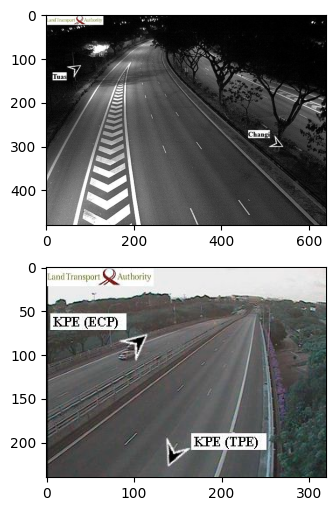

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

## Visualising the imgaes
## Low Traffic Roads

In [ ]:
# getting some visualisation of the Low traffic
dir_path = "/content/drive/MyDrive/Final Dataset/training/Low"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:4]

['/content/drive/MyDrive/Final Dataset/training/Low/135b2de6-769f-45d0-99b7-234ce64eb546.jpg',
 '/content/drive/MyDrive/Final Dataset/training/Low/0026e283-55f9-4aed-bd27-34a646bc8943.jpg',
 '/content/drive/MyDrive/Final Dataset/training/Low/02e26c3a-ca4b-43f6-bef5-429b8dfcbd87.jpg',
 '/content/drive/MyDrive/Final Dataset/training/Low/19660a1c-1a4b-4d27-acfe-206e96178a4a.jpg']

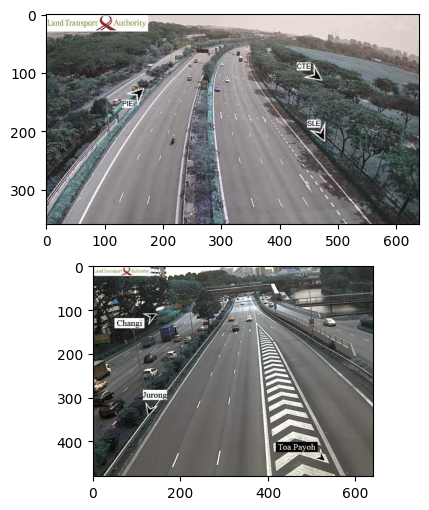

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

## Visualising the images with High traffic

In [ ]:
# with High traffic images data
dir_path = "/content/drive/MyDrive/Final Dataset/training/High"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:4]

['/content/drive/MyDrive/Final Dataset/training/High/182e38a2-0e3c-4388-ab10-5ec404fcdd4a.jpg',
 '/content/drive/MyDrive/Final Dataset/training/High/1620a732-1269-4ff4-93df-defaeb39d258.jpg',
 '/content/drive/MyDrive/Final Dataset/training/High/44add7ce-44ea-4f3b-881b-22a762d1905c.jpg',
 '/content/drive/MyDrive/Final Dataset/training/High/3561b49e-d582-4f4c-906e-64e31f632a40.jpg']

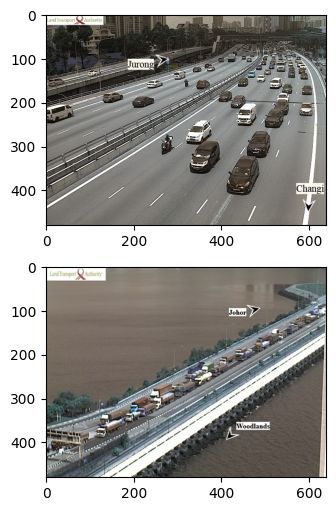

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

## Visualising the Traffic Jam data

In [ ]:
dir_path = "/content/drive/MyDrive/Final Dataset/training/Traffic Jam"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:4]

['/content/drive/MyDrive/Final Dataset/training/Traffic Jam/a94c49d7-f578-485c-b5be-4593d76c5290.jpg',
 '/content/drive/MyDrive/Final Dataset/training/Traffic Jam/images7.jpg',
 '/content/drive/MyDrive/Final Dataset/training/Traffic Jam/8f21d99a-6cbe-456b-ac4d-c162d00bae49.jpg',
 '/content/drive/MyDrive/Final Dataset/training/Traffic Jam/e424bf93-1aee-495e-8881-49998b30f7ec.jpg']

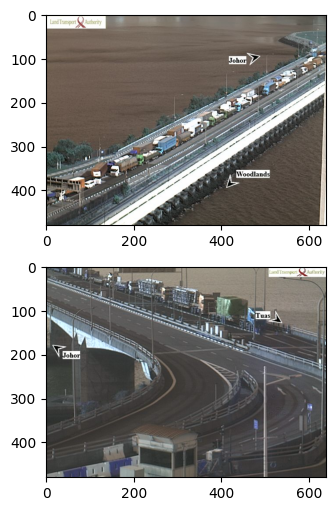

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

# Imgage processing

In [ ]:



#import os
#import cv2

#main_directory = "/content/Final Dataset/training"

# List of classes
#classes = ["Empty", "High", "Low", "Medium", "Traffic Jam"]

# Iterate over each class
#for class_name in classes:
#    class_directory = os.path.join(main_directory, class_name)

    # Iterate over each image in the class directory
#    for filename in os.listdir(class_directory):
#        if filename.endswith(".jpg"):
#            image_path = os.path.join(class_directory, filename)

            # Load the image
 #           image = cv2.imread(image_path)

 #           if image is None:
 #               print(f"Failed to load image: {image_path}")
 #               continue

            # Convert the image to grayscale
  #          grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Save the grayscale image in the same directory as the original image
   #         output_path = os.path.join(class_directory, f"grayscale_{filename}")
 #           saved = cv2.imwrite(output_path, grayscale_image)

 #           if saved:
 #               print(f"Converted {filename} to grayscale and saved to {output_path}")
 #           else:
 #               print(f"Failed to save grayscale image: {output_path}")



Converted be41dbd6-ac1c-445b-ad00-2ff5d3dc5434.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_be41dbd6-ac1c-445b-ad00-2ff5d3dc5434.jpg
Converted 8a950792-2b7f-40d3-9f6e-8c577710d96d.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_8a950792-2b7f-40d3-9f6e-8c577710d96d.jpg
Converted 0497e997-d4dd-46f1-8af4-7bff76c7dce7.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_0497e997-d4dd-46f1-8af4-7bff76c7dce7.jpg
Converted bf6f6762-e750-443a-99af-72cd0d1c18d9.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_bf6f6762-e750-443a-99af-72cd0d1c18d9.jpg
Converted bb6abeda-bcba-454f-b425-1476c0973329.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_bb6abeda-bcba-454f-b425-1476c0973329.jpg
Converted 306cfff2-410a-405b-a516-2be485adf530.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_306cfff2-410a-405b-a516-2be485adf530.jpg
Conv

# Note -
1 - All above code is for understanding how things working.

2 - Image Processing is important part, here converted all
    training images into grayscale images .so Directly work on new data .

.

# Preprocessing

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Path to the dataset directory containing grayscale images
dataset_directory = "/content/drive/MyDrive/New folder/training"

# List of classes
classes = ["Empty", "High", "Low", "Medium", "Traffic Jam"]

# Parameters for train-test-validation split
random_state = 42

# Preprocessing parameters
image_size = (64, 64)  # Specify the desired size for resizing

# List to store the preprocessed data and labels
data = []
labels = []

# Iterate over each class
for class_name in classes:
    class_directory = os.path.join(dataset_directory, class_name)

    # Iterate over each image in the class directory
    for filename in os.listdir(class_directory):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            image_path = os.path.join(class_directory, filename)

            # Load the image
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Preprocess the image (e.g., resize, normalization, etc.)
            resized_image = cv2.resize(image, image_size)

            # Normalize the image pixel values to the range [0, 1]
            normalized_image = resized_image / 255.0

            # Add the preprocessed image to the data list
            data.append(normalized_image)

            # Add the corresponding label to the labels list
            labels.append(class_name)

# Convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Path to the separate testing and validation datasets
test_dataset_directory = "/content/drive/MyDrive/New folder/testing"
validation_dataset_directory = "/content/drive/MyDrive/New folder/validation"

# List to store the testing and validation data
X_test = []
y_test = []
X_val = []
y_val = []

# Load testing data
for class_name in classes:
    class_directory = os.path.join(test_dataset_directory, class_name)

    # Iterate over each image in the class directory
    for filename in os.listdir(class_directory):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            image_path = os.path.join(class_directory, filename)

            # Load the image
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Preprocess the image (e.g., resize, normalization, etc.)
            resized_image = cv2.resize(image, image_size)

            # Normalize the image pixel values to the range [0, 1]
            normalized_image = resized_image / 255.0

            # Add the preprocessed image to the testing data list
            X_test.append(normalized_image)

            # Add the corresponding label to the testing labels list
            y_test.append(class_name)

# Load validation data
for class_name in classes:
    class_directory = os.path.join(validation_dataset_directory, class_name)

    # Iterate over each image in the class directory
    for filename in os.listdir(class_directory):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            image_path = os.path.join(class_directory, filename)

            # Load the image
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Preprocess the image (e.g., resize, normalization, etc.)
            resized_image = cv2.resize(image, image_size)

            # Normalize the image pixel values to the range [0, 1]
            normalized_image = resized_image / 255.0

            # Add the preprocessed image to the validation data list
            X_val.append(normalized_image)

            # Add the corresponding label to the validation labels list
            y_val.append(class_name)

# Convert the testing and validation data to NumPy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Print the shapes of the datasets
print("Train data shape:", data.shape)
print("Train labels shape:", labels.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)


Train data shape: (3418, 64, 64)
Train labels shape: (3418,)
Test data shape: (320, 64, 64)
Test labels shape: (320,)
Validation data shape: (340, 64, 64)
Validation labels shape: (340,)


In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 43.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Path to the dataset directory containing grayscale images
dataset_directory = "/content/drive/MyDrive/New folder/training"

# List of classes
classes = ["Empty", "High", "Low", "Medium", "Traffic Jam"]

# Parameters for train-test-validation split
random_state = 42

# Preprocessing parameters
image_size = (64,64)  # Specify the desired size for resizing

# List to store the preprocessed data and labels
data = []
labels = []

# Iterate over each class
for class_name in classes:
    class_directory = os.path.join(dataset_directory, class_name)

    # Iterate over each image in the class directory
    for filename in os.listdir(class_directory):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            image_path = os.path.join(class_directory, filename)

            # Load the image
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Preprocess the image (e.g., resize, normalization, etc.)
            resized_image = cv2.resize(image, image_size)

            # Normalize the image pixel values to the range [0, 1]
            normalized_image = resized_image / 255.0

            # Add the preprocessed image to the data list
            data.append(normalized_image)

            # Add the corresponding label to the labels list
            labels.append(class_name)

# Convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Perform train-test-validation split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=random_state)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)


# Reshape the input data to include the channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)

# Perform label encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Epoch 1/10
86/86 [==============================] - 19s 204ms/step - loss: 1.1455 - accuracy: 0.5410 - val_loss: 0.8555 - val_accuracy: 0.6316
Epoch 2/10
86/86 [==============================] - 17s 202ms/step - loss: 0.7745 - accuracy: 0.6858 - val_loss: 0.6954 - val_accuracy: 0.6813
Epoch 3/10
86/86 [==============================] - 19s 218ms/step - loss: 0.6555 - accuracy: 0.7370 - val_loss: 0.6826 - val_accuracy: 0.6901
Epoch 4/10
86/86 [==============================] - 18s 205ms/step - loss: 0.6007 - accuracy: 0.7531 - val_loss: 0.6376 - val_accuracy: 0.7339
Epoch 5/10
86/86 [==============================] - 17s 203ms/step - loss: 0.5378 - accuracy: 0.7890 - val_loss: 0.6325 - val_accuracy: 0.7105
Epoch 6/10
86/86 [==============================] - 17s 201ms/step - loss: 0.4836 - accuracy: 0.8069 - val_loss: 0.6218 - val_accuracy: 0.7222
Epoch 7/10
86/86 [==============================] - 20s 229ms/step - loss: 0.4479 - accuracy: 0.8263 - val_loss: 0.5837 - val_accuracy: 0.7368

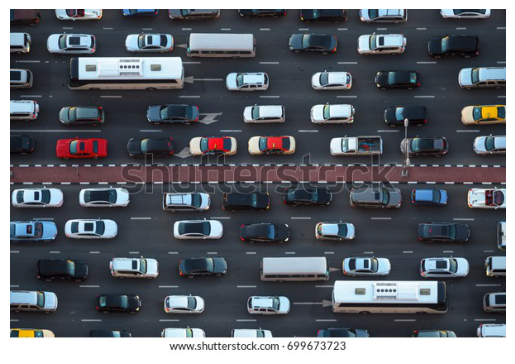

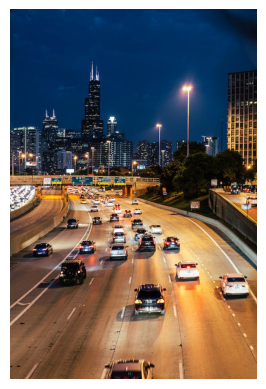

1/1 [==============================] - 0s 110ms/step
Image: https://www.shutterstock.com/image-photo/top-view-numerous-cars-traffic-600w-699673723.jpg
Predicted Label: Traffic Jam

Image: https://images.pexels.com/photos/2770654/pexels-photo-2770654.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1
Predicted Label: Traffic Jam



In [ ]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Function to load and preprocess an image
def preprocess_image(image):
    resized_image = cv2.resize(image, (64, 64))
    normalized_image = resized_image / 255.0
    input_image = np.expand_dims(normalized_image, axis=0)
    input_image = np.expand_dims(input_image, axis=-1)
    return input_image




image_urls = [
    "https://www.shutterstock.com/image-photo/top-view-numerous-cars-traffic-600w-699673723.jpg",

    "https://images.pexels.com/photos/2770654/pexels-photo-2770654.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1",


    ]

# List to store the preprocessed images and labels
input_images = []
labels = []

# Iterate over the image URLs
for image_url in image_urls:
    try:
        response = requests.get(image_url)
        response.raise_for_status()  # Check for any HTTP errors

        image = Image.open(BytesIO(response.content))

        # Convert the image to grayscale
        grayscale_image = image.convert('L')

        # Convert the PIL image to OpenCV format
        cv_image = np.array(grayscale_image)

        # Preprocess the image
        input_image = preprocess_image(cv_image)

        # Add the preprocessed image to the list
        input_images.append(input_image)

        # Store the corresponding label
        labels.append(image_url)

        # Display the image
        plt.imshow(image)
        plt.axis("off")
        plt.show()

    except requests.exceptions.RequestException as e:
        print("Error accessing the URL:", str(e))
    except Exception as e:
        print("Error:", str(e))

# Convert the list of input images to a NumPy array
input_images = np.array(input_images)

# Reshape the input images to have 4 dimensions
input_images = np.reshape(input_images, (input_images.shape[0], input_images.shape[2], input_images.shape[3], input_images.shape[4]))

# Perform predictions on the batch of images
predictions = model.predict(input_images)

# Convert predictions to class labels
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Print the predicted labels along with the images
for i in range(len(labels)):
    print("Image:", labels[i])
    print("Predicted Label:", predicted_labels[i])
    print()


1 - Converted Grayscale image data will used for training  
       and testing so based on this we can predict the output.

2 - So we can directly use the grayscale image data, trained it and get the output data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


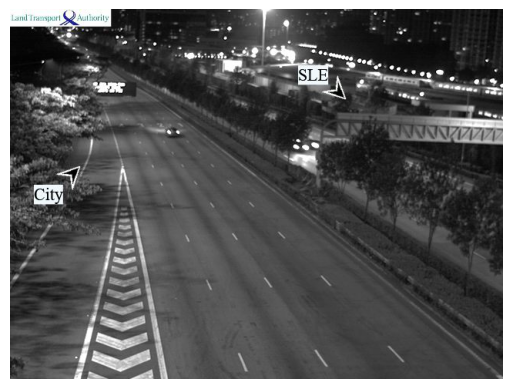

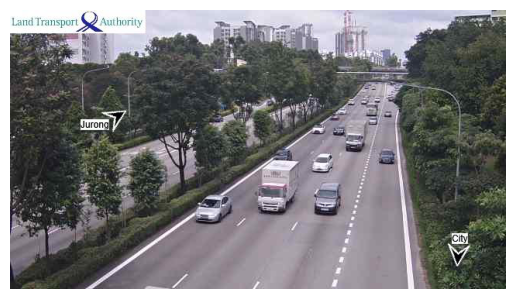

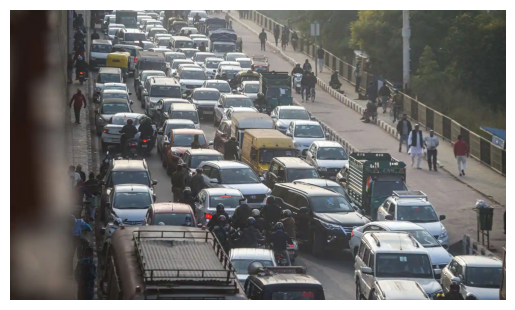

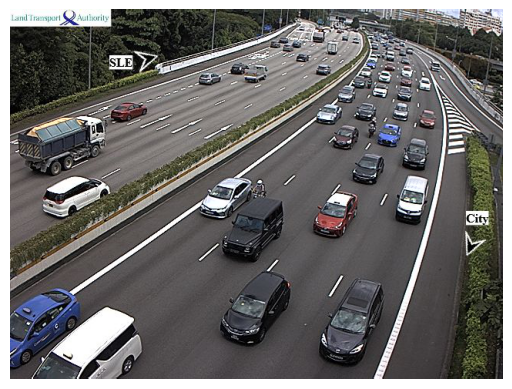

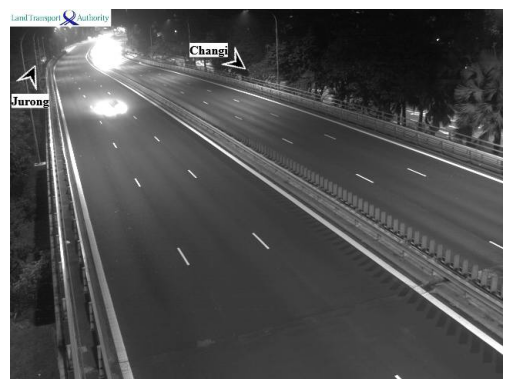

1/1 [==============================] - 0s 35ms/step
Image: /content/drive/MyDrive/New folder/testing/Empty/0a7b874b-20dd-4ab2-b2ed-89645e4c20bc.jpg
Predicted Label: Empty

Image: /content/drive/MyDrive/New folder/testing/Medium/3dc9f3ef-d37d-4221-a64e-0a9a329f85ca.jpg
Predicted Label: Medium

Image: /content/drive/MyDrive/New folder/testing/Traffic Jam/20210125_DLI-AKS-MN_Ghazipur_border-16_1611613688877_1611613697329.jpg
Predicted Label: Traffic Jam

Image: /content/drive/MyDrive/New folder/testing/High/2b9f9e51-3250-4a4f-82b1-7eab49d0aee7.jpg
Predicted Label: Low

Image: /content/drive/MyDrive/New folder/testing/Empty/1b861c63-0dec-4d1b-898f-baef5ecc4253.jpg
Predicted Label: Empty



In [ ]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Function to load and preprocess an image
def preprocess_image(image):
    resized_image = cv2.resize(image, (64, 64))
    normalized_image = resized_image / 255.0
    input_image = np.expand_dims(normalized_image, axis=0)
    input_image = np.expand_dims(input_image, axis=-1)
    return input_image




# List of image paths from your testing dataset
image_paths = [
    "/content/drive/MyDrive/New folder/testing/Empty/0a7b874b-20dd-4ab2-b2ed-89645e4c20bc.jpg",
    "/content/drive/MyDrive/New folder/testing/Medium/3dc9f3ef-d37d-4221-a64e-0a9a329f85ca.jpg",
    "/content/drive/MyDrive/New folder/testing/Traffic Jam/20210125_DLI-AKS-MN_Ghazipur_border-16_1611613688877_1611613697329.jpg",
    "/content/drive/MyDrive/New folder/testing/High/2b9f9e51-3250-4a4f-82b1-7eab49d0aee7.jpg",
    "/content/drive/MyDrive/New folder/testing/Empty/1b861c63-0dec-4d1b-898f-baef5ecc4253.jpg"
]

# List to store the preprocessed images and labels
input_images = []
labels = []

# Iterate over the image paths
for image_path in image_paths:
    try:
        # Load the image
        image = Image.open(image_path)

        # Convert the image to grayscale
        grayscale_image = image.convert('L')

        # Convert the PIL image to OpenCV format
        cv_image = np.array(grayscale_image)

        # Preprocess the image
        input_image = preprocess_image(cv_image)

        # Add the preprocessed image to the list
        input_images.append(input_image)

        # Store the corresponding label
        labels.append(image_path)

        # Display the image
        plt.imshow(image)
        plt.axis("off")
        plt.show()

    except FileNotFoundError as e:
        print("Error accessing the image:", str(e))
    except Exception as e:
        print("Error:", str(e))

# Convert the list of input images to a NumPy array
input_images = np.array(input_images)

# Reshape the input images to have 4 dimensions
input_images = np.reshape(input_images, (input_images.shape[0], input_images.shape[2], input_images.shape[3], input_images.shape[4]))

# Perform predictions on the batch of images
predictions = model.predict(input_images)

# Convert predictions to class labels
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Print the predicted labels along with the images
for i in range(len(labels)):
    print("Image:", labels[i])
    print("Predicted Label:", predicted_labels[i])
    print()


1 - It gives most of accurate prediction on testing images .


2 - which is pretty good .